## Classification demo including training

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [6]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# ip - 64 , 64 , 3 

# 1st - 3*3*64*3 + 64

# 2nd - 3*3*64*64 + 64

36928

In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [69]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255)  

train_datagen = ImageDataGenerator(rescale=1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True )

In [70]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [71]:
## Importing training data
train_set = train_datagen.flow_from_directory('dataset\\training_set',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [72]:
train_set.class_indices      # Alphabetical order number is assigned

{'cats': 0, 'dogs': 1}

In [73]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [74]:
## Importng test data
test_set = test_datagen.flow_from_directory('dataset\\test_set',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


In [75]:
# pip install pillow

In [76]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=40,
        validation_data=test_set
        )

Epoch 1/40
4/4 [==============================] - 2s 518ms/step - loss: 0.6516 - accuracy: 0.7857 - val_loss: 0.5110 - val_accuracy: 0.5789
Epoch 2/40
4/4 [==============================] - 1s 299ms/step - loss: 0.6255 - accuracy: 0.7857 - val_loss: 1.1579 - val_accuracy: 0.6316
Epoch 3/40
4/4 [==============================] - 1s 321ms/step - loss: 0.3506 - accuracy: 0.8265 - val_loss: 0.8933 - val_accuracy: 0.6053
Epoch 4/40
4/4 [==============================] - 1s 288ms/step - loss: 0.7458 - accuracy: 0.7857 - val_loss: 0.6084 - val_accuracy: 0.5526
Epoch 5/40
4/4 [==============================] - 1s 347ms/step - loss: 0.5591 - accuracy: 0.5918 - val_loss: 0.7214 - val_accuracy: 0.6316
Epoch 6/40
4/4 [==============================] - 1s 327ms/step - loss: 0.5371 - accuracy: 0.7755 - val_loss: 0.6257 - val_accuracy: 0.7105
Epoch 7/40
4/4 [==============================] - 1s 265ms/step - loss: 0.6727 - accuracy: 0.7653 - val_loss: 0.7213 - val_accuracy: 0.7105
Epoch 8/40
4/4 [====

## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

In [86]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('dataset\\single_prediction\\dog.jpg'
                           ,target_size =(64,64))

test_image1= image.load_img('dataset\\single_prediction\\dog1.jpg'
                           ,target_size =(64,64))


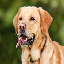

In [87]:
test_image

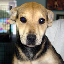

In [88]:
test_image1

In [89]:
## Convert image to array
test_image = image.img_to_array(test_image)
test_image1 = image.img_to_array(test_image1)
print( test_image.shape )
print( test_image1.shape )

(64, 64, 3)
(64, 64, 3)


In [90]:
# test_image1

In [91]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [92]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [93]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [94]:
prediction

'dog'

In [ ]:
#steps_per_epoch=50

In [95]:
# save mode

In [96]:
model_json = classifier.to_json()

with open( 'model1.json' , 'w' ) as json_file :
    json_file.write( model_json )
    
# serialize weight to HDF5

classifier.save_weights( 'model1.h5' )

print( "Saved model to disk ")

Saved model to disk 


In [ ]:
{"class_name": "Sequential",
 "config": {"name": "sequential_1", 
            "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_1", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_2", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_3", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Flatten", "config": {"name": "flatten_1", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 1, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}]}, "keras_version": "2.3.1", "backend": "tensorflow"}